# Terrorism

In [118]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from IPython.display import HTML
import warnings

In [3]:
df = pd.read_csv("./globalterrorismdb_0617dist.csv", encoding = "ISO-8859-1")

/home/lalit/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(10)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [30]:
for i in range(47):
    number_of_attacks = len(df.loc[df['country'] == 92].loc[df['iyear'] == (1970 + i)])
    print("Terrorism in India in year {}: {}".format((1970 + i), (number_of_attacks)))

Terrorism in India in year 1970: 0
Terrorism in India in year 1971: 0
Terrorism in India in year 1972: 1
Terrorism in India in year 1973: 0
Terrorism in India in year 1974: 0
Terrorism in India in year 1975: 1
Terrorism in India in year 1976: 1
Terrorism in India in year 1977: 1
Terrorism in India in year 1978: 0
Terrorism in India in year 1979: 20
Terrorism in India in year 1980: 10
Terrorism in India in year 1981: 16
Terrorism in India in year 1982: 13
Terrorism in India in year 1983: 47
Terrorism in India in year 1984: 159
Terrorism in India in year 1985: 39
Terrorism in India in year 1986: 96
Terrorism in India in year 1987: 166
Terrorism in India in year 1988: 358
Terrorism in India in year 1989: 324
Terrorism in India in year 1990: 349
Terrorism in India in year 1991: 339
Terrorism in India in year 1992: 237
Terrorism in India in year 1993: 0
Terrorism in India in year 1994: 107
Terrorism in India in year 1995: 179
Terrorism in India in year 1996: 211
Terrorism in India in year 1

In [6]:
month = ["Unkown","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
for i in range(13):
    print("Terrorism in India in Month {}: {}".format(month[i], (len(df.loc[df['country'] == 92].loc[df['imonth'] == i]))))

Terrorism in India in Month Unkown: 0
Terrorism in India in Month Jan: 900
Terrorism in India in Month Feb: 749
Terrorism in India in Month Mar: 789
Terrorism in India in Month Apr: 1123
Terrorism in India in Month May: 1076
Terrorism in India in Month Jun: 924
Terrorism in India in Month Jul: 980
Terrorism in India in Month Aug: 1085
Terrorism in India in Month Sep: 788
Terrorism in India in Month Oct: 919
Terrorism in India in Month Nov: 902
Terrorism in India in Month Dec: 743


In [8]:
#from geopy.geocoders import Nominatim
#geolocator = Nominatim()

#lat = df.loc[df['country'] == 92].head(10)['latitude']
#log = df.loc[df['country'] == 92].head(10)['longitude']

#for i in range(10):
#    loc = str(lat[i])+", "+str(log[i])
#    location = geolocator.reverse(loc)
#    print(loc)

In [18]:
pd.isnull(df).values.any()

True

In [16]:
def plot_corr(df, size=10000):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

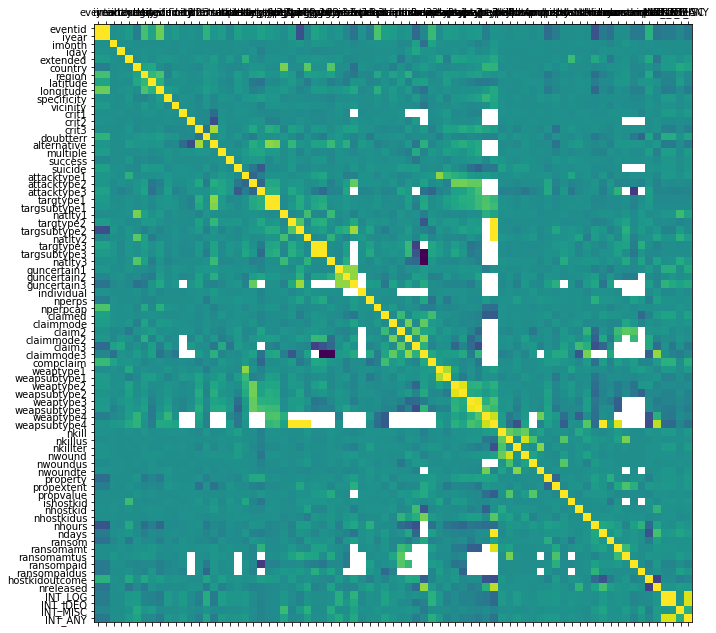

In [12]:
plot_corr(df)

In [43]:
df.loc[df['country'].idxmax()]['country']

1004

In [95]:
df.loc[df['iyear'] > 2010].groupby(['country_txt']).count()['country'].sort_values(ascending=False)

country_txt
Iraq                                15620
Pakistan                             9125
Afghanistan                          8693
India                                4711
Nigeria                              3017
Philippines                          2997
Yemen                                2794
Somalia                              2697
Libya                                2037
Thailand                             1962
Syria                                1800
Egypt                                1676
Ukraine                              1611
Turkey                               1337
Bangladesh                            857
Colombia                              808
West Bank and Gaza Strip              643
Sudan                                 612
Russia                                606
United Kingdom                        559
Israel                                554
Democratic Republic of the Congo      482
Kenya                                 449
Lebanon               

In [246]:
df.groupby(['country_txt']).groupby(['iyear']).count()['country'].sort_values(ascending=False)

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [247]:
df.groupby(['iyear']).count()['country'].sort_values(ascending=False)

iyear
2014    16860
2015    14852
2016    13488
2013    11996
2012     8500
1992     5073
2011     5071
2010     4822
2008     4803
2009     4719
1991     4683
1989     4323
1990     3887
1988     3720
1984     3495
1994     3458
2007     3241
1997     3200
1987     3184
1995     3081
1996     3056
1985     2915
1983     2870
1986     2860
2006     2749
1980     2662
1979     2661
1981     2585
1982     2545
2005     2009
2001     1907
2000     1813
1978     1526
1999     1395
2002     1332
1977     1319
2003     1262
2004     1162
1998      933
1976      923
1975      740
1970      651
1974      580
1972      496
1973      473
1971      470
Name: country, dtype: int64

In [253]:
df.groupby(['country_txt']).count()['country'].sort_values(ascending=False)

country_txt
Iraq                              22130
Pakistan                          13634
Afghanistan                       11306
India                             10978
Colombia                           8163
Philippines                        6212
Peru                               6088
El Salvador                        5320
United Kingdom                     5098
Turkey                             4106
Thailand                           3668
Somalia                            3482
Nigeria                            3418
Spain                              3245
Yemen                              3109
Sri Lanka                          2981
United States                      2758
Algeria                            2729
France                             2642
Lebanon                            2454
Chile                              2351
Egypt                              2165
Russia                             2158
West Bank and Gaza Strip           2144
Israel                      

In [110]:
data = df.loc[df['country_txt'] == "Iraq"].groupby(['iyear']).count()

In [113]:
data['country_txt']

iyear
1975       1
1976       3
1979       2
1980       6
1981       3
1982       5
1983       3
1984       2
1987       3
1988       4
1989       4
1991       3
1992      35
1994      18
1995      17
1996      12
1997      21
1998       7
1999      12
2000      10
2001       3
2002       6
2003      87
2004     320
2005     618
2006     837
2007    1047
2008    1105
2009    1137
2010    1179
2011    1308
2012    1437
2013    2849
2014    3926
2015    2744
2016    3356
Name: country_txt, dtype: int64

/home/lalit/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/lalit/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/lalit/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/lalit/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


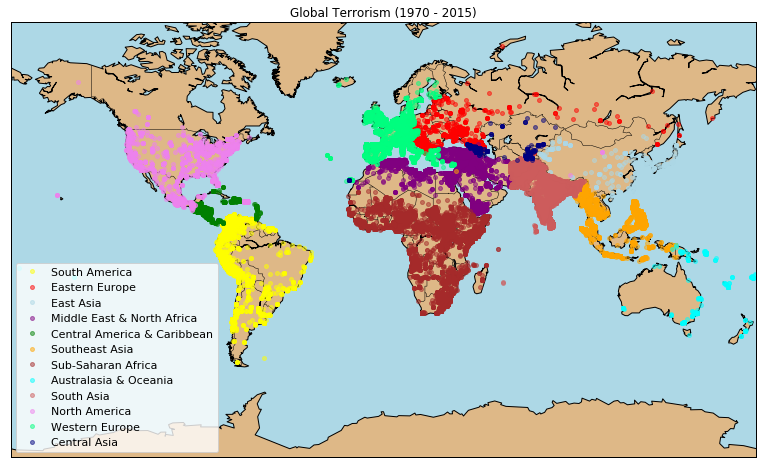

In [166]:
regions = list(set(df.region_txt))
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange', 'brown',\
          'aqua', 'indianred', 'violet', 'springgreen', 'navy']

plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = m(list(df.longitude[df.region_txt == region].astype("float")),\
            (list(df.latitude[df.region_txt == region].astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

for i, region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)  
    
plt.title("Global Terrorism (1970 - 2015)")
plt.legend(loc ='lower left', prop= {'size':11})
plt.show()    


/home/lalit/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/lalit/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/lalit/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/lalit/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


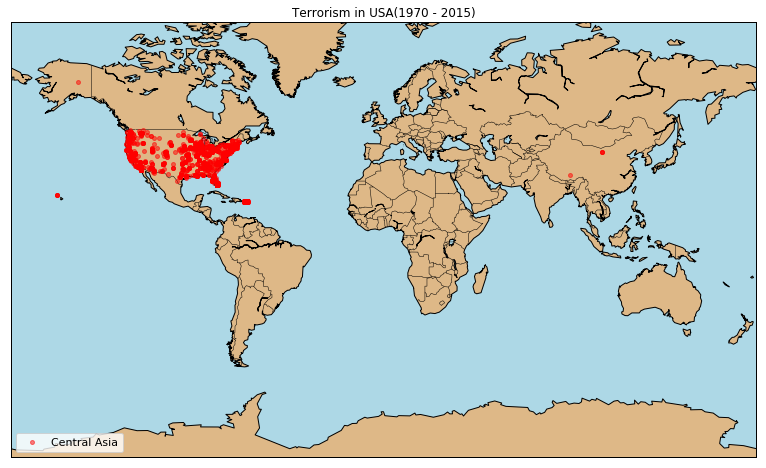

In [152]:
dfi = df.loc[df.country == 217]
regions = list(set(dfi.region_txt))
colors = ['yellow', 'red', 'lightblue', 'purple', 'green', 'orange', 'brown',\
          'aqua', 'lightpink', 'violet', 'lightgray', 'navy']

plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = m(list(dfi.longitude.astype("float")),\
            (list(dfi.latitude.astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

pltpoints(region, color = colors[1], label = region)  
    
plt.title("Terrorism in USA(1970 - 2015)")
plt.legend(loc ='lower left', prop= {'size':11})
plt.show()    


In [167]:
df.shape

(170350, 135)

In [226]:
lk = df.head(3)
lk

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [227]:
k = list(df)
k

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [255]:
col_needed = k[0:4]+k[8:11]+k[13:17]+k[19:25]+k[26:34]+["nkill"]
col_needed

['eventid',
 'iyear',
 'imonth',
 'iday',
 'country_txt',
 'region',
 'region_txt',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'nkill']

In [291]:
lk = df.head(5)
lk = lk.iloc[:,35:60]
lk = df.tail(5)

In [284]:
ind = df.loc[df['country'] == 92].loc[df['nkill'] > 0]['nkill'].sum()
wld = df.loc[df['nkill'] > 0]['nkill'].sum()
print("Total number of casualties in India: {0} that is {1:2.2f}% of total number of casualties in the world({2})".format(int(ind),(ind/wld)*100,int(wld)))

Total number of casualties in India: 18842 that is 4.91% of total number of casualties in the world(383554)


In [303]:
print("Number of casualties in decreasing order of 40 countries")
rq = df[['country_txt','nkill']]
rq.loc[df['nkill'] > 0].groupby(['country_txt']).sum()['nkill'].sort_values(ascending=False).head(40)

Number of casualties in decreasing order of 40 countries


country_txt
Iraq                                71082.0
Afghanistan                         33146.0
Pakistan                            22734.0
Nigeria                             20665.0
India                               18842.0
Sri Lanka                           15528.0
Colombia                            14600.0
Syria                               13132.0
Peru                                12763.0
El Salvador                         12053.0
Algeria                             11091.0
Nicaragua                           10598.0
Philippines                          9058.0
Somalia                              8254.0
Yemen                                8011.0
Turkey                               6664.0
Guatemala                            5167.0
Russia                               4246.0
Burundi                              4182.0
Lebanon                              4038.0
Sudan                                3801.0
United States                        3648.0
Democratic Republic 